### PCA 
- Python is really simple to use.
- I used unscaled data because it somehow gave me better explained variance 
- The goal here is to visualize the temperature trends inside a PMSM (electrical machines) using PCA to reduce the number of axes from 6 to 2.

## Libraries

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # we will use PCA from sklearn

load our data to see the columns here since we're willing to keep only the temprature features so we will drop features like i_d....

In [74]:
df = pd.read_csv('PMSM.csv')
df.info()
# we good no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [75]:
print(df.columns)

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')


here we drop non thermal features since we only need what's temperature measurment

In [76]:
dropped = ['u_q','u_d','motor_speed','profile_id','torque','i_d','i_q']
th = df.drop(dropped,axis=1) 
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   coolant         1330816 non-null  float64
 1   stator_winding  1330816 non-null  float64
 2   stator_tooth    1330816 non-null  float64
 3   pm              1330816 non-null  float64
 4   stator_yoke     1330816 non-null  float64
 5   ambient         1330816 non-null  float64
dtypes: float64(6)
memory usage: 60.9 MB


## PCA
we want out of this six features to use only the first two PC's

In [77]:
# our new data with 2 columns you can see how easy is it to use sklearn!
pca = PCA(n_components=2)
th_pca = pca.fit_transform(th)
pca_th = pd.DataFrame(data = th_pca, columns = ['PC1', 'PC2'])

we can see below that with just two PCs we get 95.7 % of total explained variance !

In [78]:
# we're seeing how many info we capture with 2 components
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print(explained_variance_ratio)

[0.83117137 0.95709131]


In [82]:
# our new data set
pca_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   PC1     1330816 non-null  float64
 1   PC2     1330816 non-null  float64
dtypes: float64(2)
memory usage: 20.3 MB


a small plot to visualize our two PCs, we will try to extract some useful info from the plot 

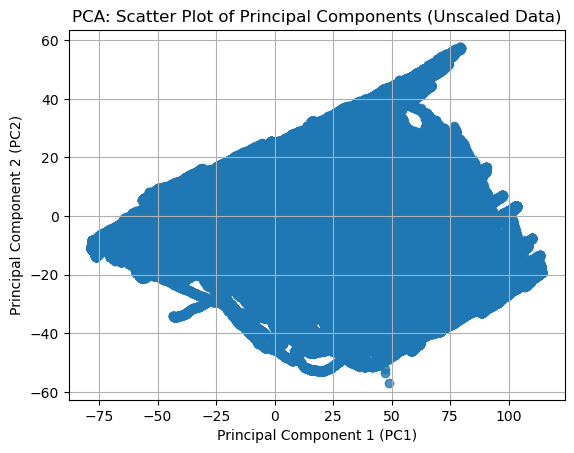

In [81]:

# visualize the data
plt.scatter(pca_th["PC1"], pca_th["PC2"], alpha=0.8)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA: Scatter Plot of Principal Components (Unscaled Data)")
plt.grid(True)
plt.show()

it's usefull to know how our PCs are built 

In [57]:
# Extract the loadings of each original feature on PC1 and PC2
loadings_df = pd.DataFrame(data=pca.components_.T, columns=["PC1", "PC2"], index=df.columns)
print(loadings_df)

                     PC1       PC2
coolant         0.343306 -0.821735
stator_winding  0.586611  0.436727
stator_tooth    0.492285  0.092026
pm              0.346433  0.248775
stator_yoke     0.418650 -0.250879
ambient         0.020026 -0.026883


# oooy 
that was a simple implementation of PCA, it's not really useful in this case but i wanted to use it on a simple dataset, From this plot, we can understand that the axes are correlated, which means that the temperatures in the machine tend to get high and low together, which is logical. 

- The points in the upper-right corner of the plot represent the points that have high values for both PC1 and PC2. These points are likely to be the hottest points in the PMSM.
- The points in the lower-left corner of the plot represent the points that have low values for both PC1 and PC2. These points are likely to be the coldest points in the PMSM.
- The points that are closest to the origin represent the points that are least affected by the principal components. These points are likely to be the most stable points in the data set.